# Final Project: Principal Component Analysis

## Introduction

In the the first part, you will implement principal component analysis and apply it to find a low-dimensional representation of face images.

In the second part, you will apply PCA implemented by Sklean and do some analysis on face images


## Save Your Notebook!
- Click on File (upper left corner), Select “Save”.
- Important: You may loose your modification to a notebook if you do not Save it explicitly.
- Advice: Save often.  


## Submission
- Please follow the instructions and finish the exercises.
- After you finish the lab, please Click on File, Select “Download as”, Choose Notebook (.ipynb)
- Please also Click on File, Select ``Print'', and choose ``Save as PDF''
- Submit both the Notebook file and the PDF File as your submission for Final Project.

Note that we will grade your PDF file, make sure that your answers are clearly shown in the PDF file. We will run the Notebook file if your code is difficult to understand.

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from matplotlib.animation import FuncAnimation

from IPython.display import HTML, display, clear_output

try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

%load_ext autoreload
%autoreload 2


# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Upload datasets to Google Drive
Please download the datasets from Canvas. Please create ``DS305`` in Google Drive and upload the datasets to ``DS305``.

In order to read data from Google Drive, we need to Mount the Google Drive using the following code

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Principal Component Analysis: Implementation

In this exercise, you will use principal component analysis (PCA) to perform dimensionality reduction. You will first experiment with an example 2D dataset to get intuition on how PCA works, and then use it on a bigger dataset of 5000 face image dataset.

### 1.1 Example Dataset

To help you understand how PCA works, you will first start with a 2D dataset which has one direction of large variation and one of smaller variation. The cell below will plot the training data, also shown in here:

In this part of the exercise, you will visualize what happens when you use PCA to reduce the data from 2D to 1D. In practice, you might want to reduce data from 256 to 50 dimensions, say; but using lower dimensional data in this example allows us to visualize the algorithms better.

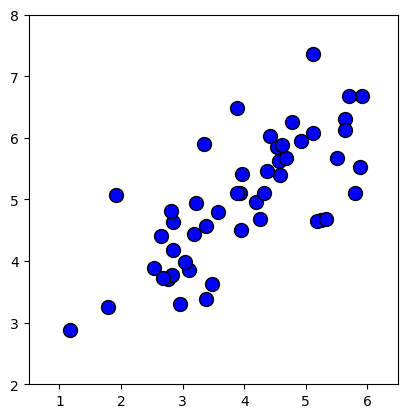

In [3]:
# Load the dataset into the variable X
dir = '/content/drive/My Drive/DS305/'
data = loadmat(os.path.join(dir, 'final_project_data1.mat'))
X = data['X']

#  Visualize the example dataset
pyplot.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=1)
pyplot.axis([0.5, 6.5, 2, 8])
pyplot.gca().set_aspect('equal')
pyplot.grid(False)

<a id="section3"></a>
### 1.2 Implementing PCA  <font color='green'>(Exercise 1)</font>

In this part of the exercise, you will implement PCA. PCA consists of two computational steps:

1. Compute the covariance matrix of the data.
2. Use SVD (in python we use numpy's implementation `np.linalg.svd`) to compute the eigenvectors $U_1$, $U_2$, $\dots$, $U_n$. These will correspond to the principal components of variation in the data.

First, you should compute the covariance matrix of the data, which is given by:

$$ \Sigma = \frac{1}{m} X^T X$$

where $X$ is the data matrix with examples in rows, and $m$ is the number of examples. Note that $\Sigma$ is a $n \times n$ matrix and not the summation operator.

After computing the covariance matrix, you can run SVD on it to compute the principal components. In python and `numpy` (or `scipy`), you can run SVD with the following command: `U, S, V = np.linalg.svd(Sigma)`, where `U` will contain the principal components and `S` will contain a diagonal matrix. Note that the `scipy` library also has a similar function to compute SVD `scipy.linalg.svd`. The functions in the two libraries use the same C-based library (LAPACK) for the SVD computation, but the `scipy` version provides more options and arguments to control SVD computation. In this exercise, we will stick with the `numpy` implementation of SVD.

Complete the code in the following cell to implemente PCA.
<a id="pca"></a>

In [4]:
def pca(X):
    """
    Run principal component analysis.

    Parameters
    ----------
    X : array_like
        The dataset to be used for computing PCA. It has dimensions (m x n)
        where m is the number of examples (observations) and n is
        the number of features.

    Returns
    -------
    U : array_like
        The eigenvectors, representing the computed principal components
        of X. U has dimensions (n x n) where each column is a single
        principal component.

    S : array_like
        A vector of size n, contaning the singular values for each
        principal component. Note this is the diagonal of the matrix we
        mentioned in class.

    Instructions
    ------------
    You should first compute the covariance matrix. Then, you
    should use the "svd" function to compute the eigenvectors
    and eigenvalues of the covariance matrix.

    Notes
    -----
    When computing the covariance matrix, remember to divide by m (the
    number of examples).
    """
    # Useful values
    m, n = X.shape

    # You need to return the following variables correctly.
    U = np.zeros(n)
    S = np.zeros(n)

    # ====================== YOUR CODE HERE ======================
    # Hint: look up for np.linalg.svd()
    Sigma = (1 / m) * np.dot(X.T, X)
    U, S, _ = np.linalg.svd(Sigma)
    # ============================================================
    return U, S

Before using PCA, it is important to first normalize the data by subtracting the mean value of each feature from the dataset, and scaling each dimension so that they are in the same range.

In the next cell,  this normalization will be performed for you using the `featureNormalize` function.
After normalizing the data, you can run PCA to compute the principal components. Your task is to complete the code in the function `pca` to compute the principal components of the dataset.

Once you have completed the function `pca`, the following cell will run PCA on the example dataset and plot the corresponding principal components found similar to the figure below.

<img src='https://drive.google.com/uc?id=1jdAEKgaajMbK4qTLJKkx80Bna9uvPJlr'>


The following cell will also output the top principal component (eigenvector) found, and you should expect to see an output of about `[-0.707 -0.707]`. (It is possible that `numpy` may instead output the negative of this, since $U_1$ and $-U_1$ are equally valid choices for the first principal component.)

In [5]:
def featureNormalize(X):
    """
    Normalizes the features in X returns a normalized version of X where the mean value of each
    feature is 0 and the standard deviation is 1. This is often a good preprocessing step to do when
    working with learning algorithms.

    Parameters
    ----------
    X : array_like
        An dataset which is a (m x n) matrix, where m is the number of examples,
        and n is the number of dimensions for each example.

    Returns
    -------
    X_norm : array_like
        The normalized input dataset.

    mu : array_like
        A vector of size n corresponding to the mean for each dimension across all examples.

    sigma : array_like
        A vector of size n corresponding to the standard deviations for each dimension across
        all examples.
    """
    mu = np.mean(X, axis=0)
    X_norm = X - mu

    sigma = np.std(X_norm, axis=0, ddof=1)
    X_norm /= sigma
    return X_norm, mu, sigma

Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


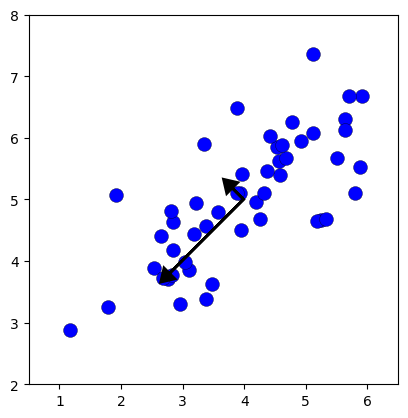

In [6]:
#  Before running PCA, it is important to first normalize X
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = pyplot.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], S[i]*U[0, i], S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

### 1.3 Dimensionality Reduction with PCA  <font color='green'>(Exercise 2)</font>

After computing the principal components, you can use them to reduce the feature dimension of your dataset by projecting each example onto a lower dimensional space, $x^{(i)} \rightarrow z^{(i)}$ (e.g., projecting the data from 2D to 1D). In this part of the exercise, you will use the eigenvectors returned by PCA and
project the example dataset into a 1-dimensional space. In practice, if you were using a learning algorithm such as linear regression or perhaps neural networks, you could now use the projected data instead of the original data. By using the projected data, you can train your model faster as there are less dimensions in the input.

<a id="section4"></a>

#### 1.3.1 Projecting the data onto the principal components

You should now complete the code in the function `projectData`. Specifically, you are given a dataset `X`, the principal components `U`, and the desired number of dimensions to reduce to `K`. You should project each example in `X` onto the top `K` components in `U`. Note that the top `K` components in `U` are given by
the first `K` columns of `U`, that is `Ureduce = U[:, :K]`.
<a id="projectData"></a>

In [7]:
def projectData(X, U, K):
    """
    Computes the reduced data representation when projecting only
    on to the top K eigenvectors.

    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n). The dataset is assumed to be
        normalized.

    U : array_like
        The computed eigenvectors using PCA. This is a matrix of
        shape (n x n). Each column in the matrix represents a single
        eigenvector (or a single principal component).

    K : int
        Number of dimensions to project onto. Must be smaller than n.

    Returns
    -------
    Z : array_like
        The projects of the dataset onto the top K eigenvectors.
        This will be a matrix of shape (m x K).

    Instructions
    ------------
    Compute the projection of the data using only the top K
    eigenvectors in U (first K columns).
    For the i-th example X[i,:], the projection on to the k-th
    eigenvector is given as follows:

        x = X[i, :]
        projection_k = np.dot(x,  U[:, k])

    """
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))

    # ====================== YOUR CODE HERE ======================
    # Hint: U[:,0:K] will give you the first K columns
    # X: m x n
    Z = np.dot(X, U[:, 0:K])

    # =============================================================
    return Z

Once you have completed the code in `projectData`, the following cell will project the first example onto the first dimension and you should see a value of about 1.481 (or possibly -1.481, if you got $-U_1$ instead of $U_1$).

In [8]:
#  Project the data onto K = 1 dimension
K = 1
Z = projectData(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.481274
(this value should be about    : 1.481274)


<a id="section5"></a>
#### 1.3.2 Reconstructing an approximation of the data  <font color='green'>(Exercise 3)</font>

After projecting the data onto the lower dimensional space, you can approximately recover the data by projecting them back onto the original high dimensional space. Your task is to complete the function `recoverData` to project each example in `Z` back onto the original space and return the recovered approximation in `Xrec`.
<a id="recoverData"></a>

In [9]:
def recoverData(Z, U, K):
    """
    Recovers an approximation of the original data when using the
    projected data.

    Parameters
    ----------
    Z : array_like
        The reduced data after applying PCA. This is a matrix
        of shape (m x K).

    U : array_like
        The eigenvectors (principal components) computed by PCA.
        This is a matrix of shape (n x n) where each column represents
        a single eigenvector.

    K : int
        The number of principal components retained
        (should be less than n).

    Returns
    -------
    X_rec : array_like
        The recovered data after transformation back to the original
        dataset space. This is a matrix of shape (m x n), where m is
        the number of examples and n is the dimensions (number of
        features) of original datatset.

    Instructions
    ------------
    Compute the approximation of the data by projecting back
    onto the original space using the top K eigenvectors in U.
    For the i-th example Z[i,:], the (approximate)
    recovered data for dimension j is given as follows:

        v = Z[i, :]
        recovered_j = np.dot(v, U[j, :K])

    Notice that U[j, :K] is a vector of size K.
    """
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))

    # ====================== YOUR CODE HERE ======================
    # Hint: we need the dot product between Z and U[:,:K].T
    # Z: m x K
    for i in range(Z.shape[0]):
      for j in range(U.shape[0]):
        X_rec[i, j] = np.dot(Z[i, :], U[j, :K])

    # =============================================================
    return X_rec

Once you have completed the code in `recoverData`, the following cell will recover an approximation of the first example and you should see a value of about `[-1.047 -1.047]`. The code will then plot the data in this reduced dimension space. This will show you what the data looks like when using only the corresponding eigenvectors to reconstruct it. An example of what you should get for PCA projection is shown in this figure:

<img src='https://drive.google.com/uc?id=1BEyn38WFgJ2_NcusnGTK5pY64PgMttDd'>

In the figure above, the original data points are indicated with the blue circles, while the projected data points are indicated with the red circles. The projection effectively only retains the information in the direction given by $U_1$. The dotted lines show the distance from the data points in original space to the projected space. Those dotted lines represent the error measure due to PCA projection.

Approximation of the first example: [-1.047419 -1.047419]
       (this value should be about  [-1.047419 -1.047419])


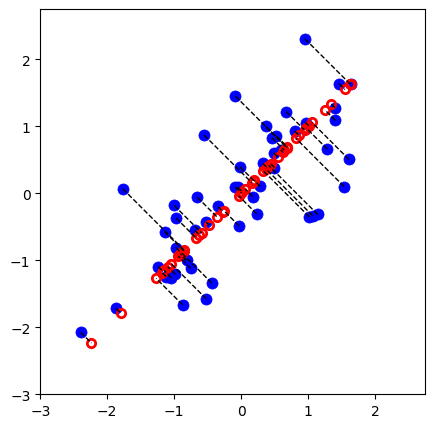

In [10]:
X_rec  = recoverData(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = pyplot.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
pyplot.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

### 1.4 Face Image Dataset

In this part of the exercise, you will run PCA on face images to see how it can be used in practice for dimension reduction. The dataset `ex7faces.mat` contains a dataset `X` of face images, each $32 \times 32$ in grayscale. This dataset was based on a [cropped version](http://conradsanderson.id.au/lfwcrop/) of the [labeled faces in the wild](http://vis-www.cs.umass.edu/lfw/) dataset. Each row of `X` corresponds to one face image (a row vector of length 1024).

The next cell will load and visualize the first 100 of these face images similar to what is shown in this figure:

<img src='https://drive.google.com/uc?id=1CfyjsWl8BG1LUIwo8sLpYwhr9gFZD9wi'>

In [11]:
def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data in a nice grid.

    Parameters
    ----------
    X : array_like
        The input data of size (m x n) where m is the number of examples and n is the number of
        features.

    example_width : int, optional
        THe width of each 2-D image in pixels. If not provided, the image is assumed to be square,
        and the width is the floor of the square root of total number of pixels.

    figsize : tuple, optional
        A 2-element tuple indicating the width and height of figure in inches.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

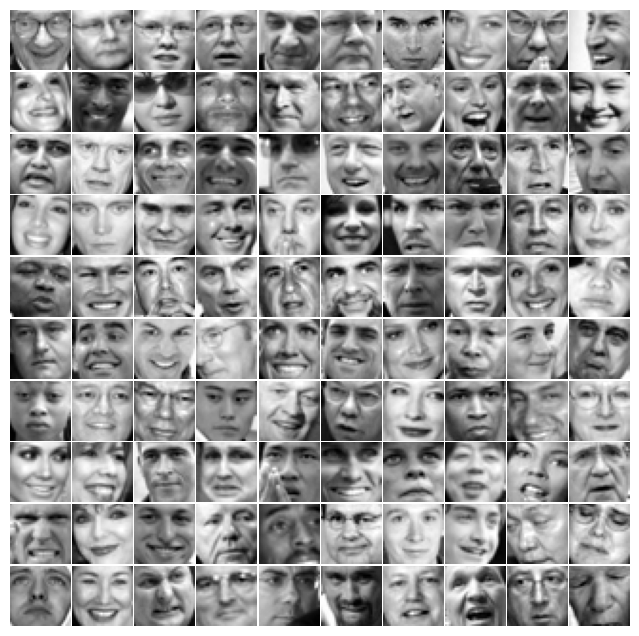

In [12]:
#  Load Face dataset
data = loadmat(os.path.join(dir, 'final_project_faces.mat'))
X = data['X']

#  Display the first 100 faces in the dataset
displayData(X[:100, :], figsize=(8, 8))

#### 1.4.1 PCA on Faces

To run PCA on the face dataset, we first normalize the dataset by subtracting the mean of each feature from the data matrix `X`.  After running PCA, you will obtain the principal components of the dataset. Notice that each principal component in `U` (each column) is a vector of length $n$ (where for the face dataset, $n = 1024$). It turns out that we can visualize these principal components by reshaping each of them into a $32 \times 32$ matrix that corresponds to the pixels in the original dataset.

The following cell will first normalize the dataset for you and then run your PCA code. Then, the first 36 principal components (conveniently called eigenfaces) that describe the largest variations are displayed. If you want, you can also change the code to display more principal components to see how they capture more and more details.

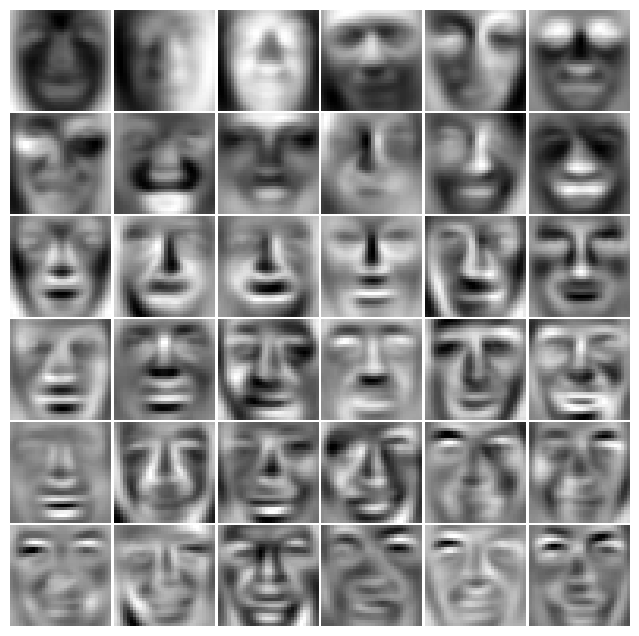

In [13]:
#  normalize X by subtracting the mean value from each feature
X_norm, mu, sigma = featureNormalize(X)

#  Run PCA
U, S = pca(X_norm)

#  Visualize the top 36 eigenvectors found
displayData(U[:, :36].T, figsize=(8, 8))

#### 1.4.2 Dimensionality Reduction

Now that you have computed the principal components for the face dataset, you can use it to reduce the dimension of the face dataset. This allows you to use your learning algorithm with a smaller input size (e.g., 100 dimensions) instead of the original 1024 dimensions. This can help speed up your learning algorithm.

The next cell will project the face dataset onto only the first 100 principal components. Concretely, each face image is now described by a vector $z^{(i)} \in \mathbb{R}^{100}$. To understand what is lost in the dimension reduction, you can recover the data using only the projected dataset.

In [14]:
#  Project images to the eigen space using the top k eigenvectors
#  If you are applying a machine learning algorithm
K = 100
Z = projectData(X_norm, U, K)

print('The projected data Z has a shape of: ', Z.shape)

The projected data Z has a shape of:  (5000, 100)


In the next cell, an approximate recovery of the data is performed and the original and projected face images
are displayed similar to what is shown here:

<table>
    <tr>
        <td><img src="https://drive.google.com/uc?id=1dN8AMF0ez0_7hwlo_ieGnPVordpu1keP" width="300"></td>
        <td><img src="https://drive.google.com/uc?id=12bFyse344R_e9msliyxw3pAAeAcvjE4t" width="300"></td>
    </tr>
</table>

From the reconstruction, you can observe that the general structure and appearance of the face are kept while the fine details are lost. This is a remarkable reduction (more than 10x) in the dataset size that can help speed up your learning algorithm significantly. For example, if you were training a neural network to perform person recognition (given a face image, predict the identity of the person), you can use the dimension reduced input of only a 100 dimensions instead of the original pixels.

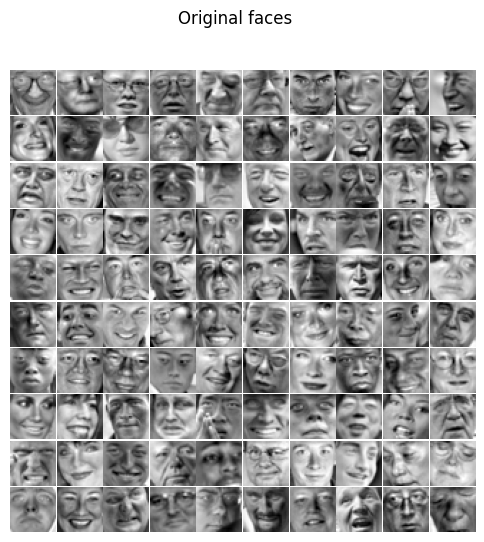

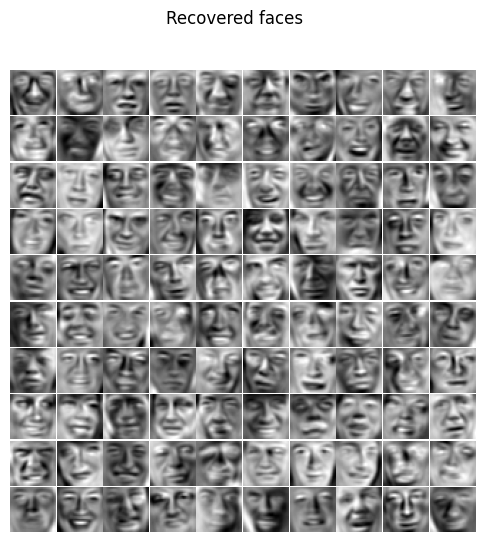

In [15]:
#  Project images to the eigen space using the top K eigen vectors and
#  visualize only using those K dimensions
#  Compare to the original input, which is also displayed
K = 100
X_rec  = recoverData(Z, U, K)

# Display normalized data
displayData(X_norm[:100, :], figsize=(6, 6))
pyplot.gcf().suptitle('Original faces')

# Display reconstructed data from only k eigenfaces
displayData(X_rec[:100, :], figsize=(6, 6))
pyplot.gcf().suptitle('Recovered faces')
pass

## 2 Explore Eigenface with PCA

In this exercise, you will apply PCA implemented by Sklearn for some exploration of Eigenfaces

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

faces = pd.read_csv(os.path.join('/content/drive/My Drive/DS305/', 'face_data.csv'))

print(faces.shape)

(400, 4097)


Run the two blocks of code above. If successful, you should see the shape (dimension) of the variable *faces*, which was read in as a pandas data frame.

faces.shape is (400, 4097)

400 rows: 400 faces. Each row corresponds data for one face

For each row, 4097 columns: first 4096 columns are gray-scale pixel values of a 64*64 face image; the last (i.e. 4097th) column is the ID (person ID) of the face.

Each person ID has 10 faces which correspond to 10 rows in the faces matrix

Next, let's define a function to plot some faces. You can specify how many rows (nRows) and how many columns (nCols) of faces you want to display using plt.subplots() function.


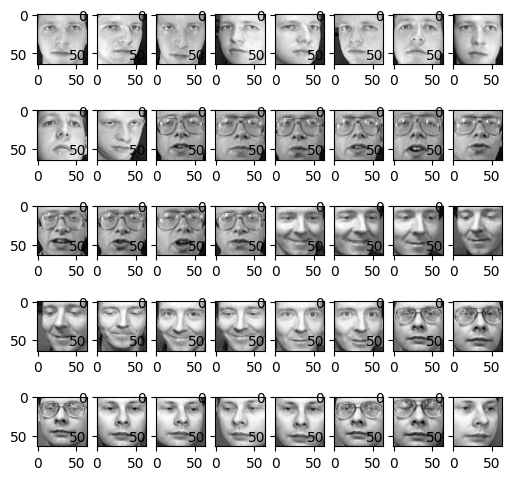

In [17]:
def plot_faces(pixels, nRows,nCols):
    fig, axes = plt.subplots(nRows, nCols, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

X = faces.drop('target', axis=1)
y = faces['target']

# display the first nRows*nCols of faces in the dataset
plot_faces(X, 5, 8)

# TASK 1:  
Read the code block above. Explain how the plot_faces function works.  Explain the line that defines X, and the line that defines y.  You can write your explanation (comments) below in this text block.

# Please add your explanation (comments) here:

The code block above defines plot_faces to display face images in a grid, extracts features X and labels y from a DataFrame, and visualizes a subset of faces. X contains all columns except 'target'. The function uses Matplotlib to create subplots and display the images.

Next, let's calculate and display the mean face.

(4096,)


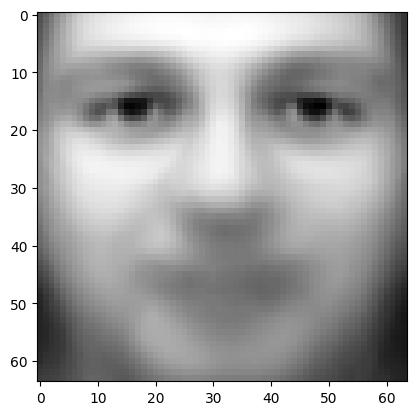

In [18]:
mean_X = X.mean(axis=0)

print(mean_X.shape)

faceplot = plt.imshow(np.array(mean_X).reshape(64, 64), cmap='gray')

Next, before applying principal component analysis (PCA), we want to center the data, by subtracting the mean face from every face. Plot the zero-mean faces to compare with the original faces.

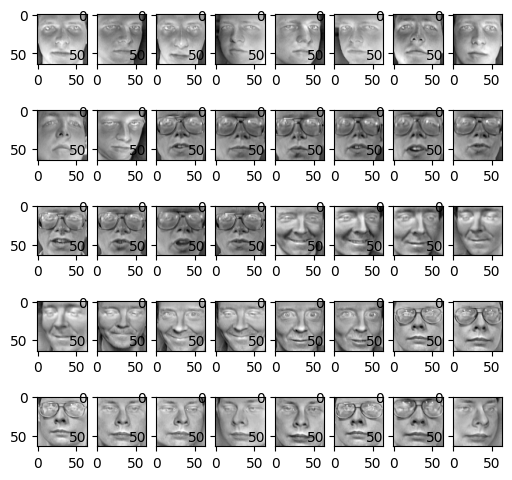

In [19]:
zeromean_X = X - mean_X

plot_faces(zeromean_X, 5, 8)

Now, let's use the sklearn.decomposition to apply (i.e. fit) PCA to the data.  

In [20]:
from sklearn.decomposition import PCA

# reduce to 20 dimensional weight vector to represent each face; dimension reduction from 4096 to 20; input to PCA is centered but not scaled
pca = PCA(n_components=20)
pca.fit(zeromean_X)

PCA(n_components=20)

# TASK 2:
Read the documentation for sklearn.decomposition.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Explain what the code block above does.

# Please add your explanation here:
This code block sets up a PCA model with 20 components and fits it to the input data zeromean_X. The ultimate goal is to represent each face in the dataset using a reduced set of 20 features (principal components) obtained through PCA.

After PCA fit, extract the eigenfaces, which are the eigenvectors of the covariance matrix of X. To know the details of the PCA algorithm, please read and try to understand the slides in "Eigenfaces.pdf" or read the eigenfaces paper.  The code block below gets the eigenfaces (i.e. eigenvectors) and plot the first 20 eigenfaces.

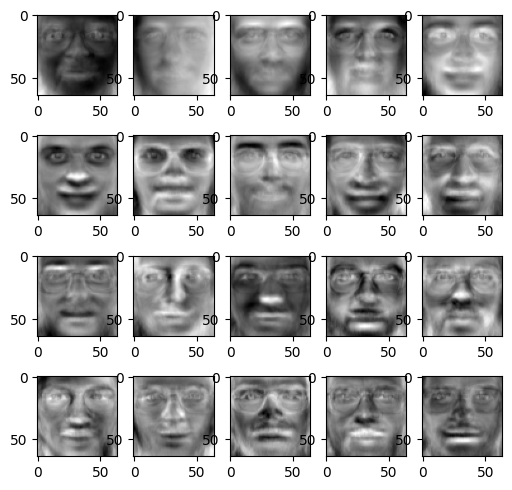

In [21]:
eigenfaces = pca.components_

plot_faces(eigenfaces, 4, 5)

# TASK 3:
The code block below performs dimension reduction using the PCA fit acquired above. Explain what pca.transform does and how it works.

# Please add your explanation here:
The subsequent lines transform zeromean_X using pca.transform. This applies dimensionality reduction, projecting the data onto the learned principal components. The resulting zeromean_X_pca is printed to show its shape, reflecting the reduced dimensionality (number of examples, 20).



In [22]:
zeromean_X_pca = pca.transform(zeromean_X)

print(zeromean_X_pca.shape)

(400, 20)


Now we have successfully reduced the dimensionality of faces from 4096 to 20, i.e. now each face is represented by a 20-dimensional weight vector instead of a 4096-dimensional raw pixel value vector, let us try to reconstruct the original faces using the 20-dimensional weight vector and then compare the reconstructed faces with the original faces.

(20, 4096)
(400, 20)


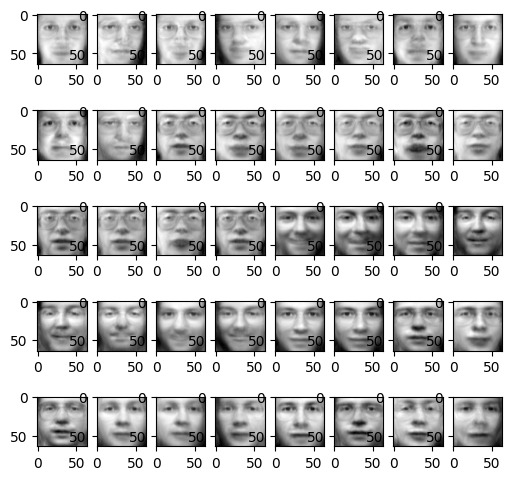

In [23]:
print(eigenfaces.shape)
print(zeromean_X_pca.shape)

reconstructed_zeromean_X = np.matmul(zeromean_X_pca, eigenfaces)

mean_matrix = np.tile(mean_X, (400,1))

reconstructed_X = reconstructed_zeromean_X + mean_matrix

plot_faces(reconstructed_X, 5, 8)


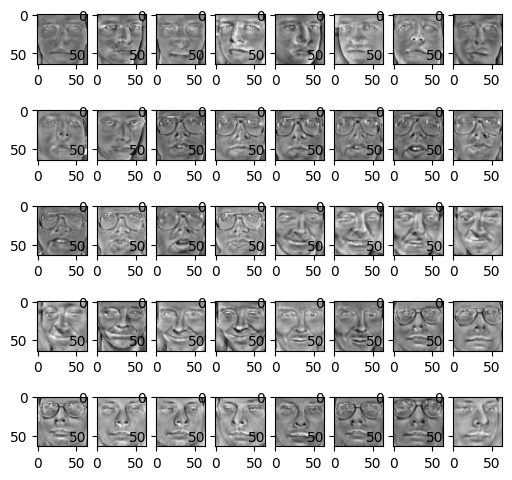

In [24]:
diff = X - reconstructed_X
plot_faces(diff, 5, 8)

The "difference" faces, i.e. the difference between original face and the reconstructed face is calculated and visualized above, let's calculate the L2-norm of each diff face and print out the maximum norm among all diff faces.  Remember that, the reconstruction that was already done was using 20 PCA components (n_components = 20).

In [25]:
diff_norm = np.linalg.norm(diff, axis=1)

print(np.max(diff_norm))

6.25459839271717


# Task 4:
What is the maximum norm of all diff faces using 20 PCA components for reconstruction?  If you have successfully executed the code block above, it should give you the answer, which you can write here:

# Please write your answer to the question above here:
6.254126615932137

#Task 5:
Write your own code to repeat the PCA fit and face reconstruction steps above, but instead of using 20 components for PCA fit, use 150 components for PCA fit in your own code.

Your code should perform PCA fit using 150 components, get the reconstructed faces using 150 components, calculate the difference (diff) faces between the reconstructed faces and original faces, and then calculate the norm of the diff faces and print out the maximum norm among all diff faces.

#What is the maximum norm of all diff faces using 150 PCA components for reconstruction? Write the output of your code and your answer here:


In [26]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Assume zeromean_X is your centered data

# Perform PCA fit with 150 components
pca_150 = PCA(n_components=150)
pca_150.fit(zeromean_X)

# Transform the data using 150 components
zeromean_X_pca_150 = pca_150.transform(zeromean_X)

# Reconstruct faces using 150 components
reconstructed_faces_150 = pca_150.inverse_transform(zeromean_X_pca_150)

# Calculate difference faces
diff_faces_150 = zeromean_X - reconstructed_faces_150

# Calculate the norm of diff faces and print the maximum norm
norm_diff_faces_150 = np.linalg.norm(diff_faces_150, axis=1)
max_norm_diff_faces_150 = np.max(norm_diff_faces_150)

print("Maximum norm of difference faces using 150 PCA components:", max_norm_diff_faces_150)


Maximum norm of difference faces using 150 PCA components: 2.1217554167971877


Having observed how dimension reduction works and how using more PCA components gives smaller reconstruction error, let us do another experiment to look at how the faces vary along each eigenface (or eigenvector) direction. In order to visualize the variation along a particular eigenface direction, we will plot five faces along each eigenface direction: mean_face - 2* singular_value * eigenface, mean_face - singular_value * eigenface, mean_face, mean_face + singular_value * eigenface, mean_face + 2* singular_value * eigenface

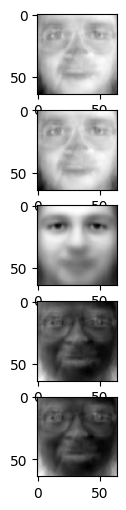

In [27]:
eigenface_ID = 0;

face = eigenfaces[eigenface_ID]
s = pca.singular_values_[eigenface_ID]
s_row = np.ones(4096)*s

f0= np.array(mean_X) - np.array(face)*np.array(2*s_row)
f1 = np.array(mean_X) - np.array(face)*np.array(s_row)
f2 = np.array(mean_X)
f3 = np.array(mean_X) + np.array(face)*np.array(s_row)
f4 = np.array(mean_X) + np.array(face)*np.array(2*s_row)

f=np.vstack((f0.T,f1.T,f2.T,f3.T,f4.T))

plot_faces(f, 5,1)

# Task 6
Read the code block above, and explain what it does and how it works.

#Please write your explanation for the code block above here:
The code generates and displays five faces representing variations along the principal component (eigenface) specified by eigenface_ID. It calculates faces by adjusting the mean face in both positive and negative directions, scaled by singular values. The resulting faces are visualized using plot_faces

#Task 7
Now write your own code to visualize the five exemplar faces along the second eigenface direction, along the third eigenface direction, and along the fourth eigenface direction.

Your code should display five exemplar faces for each eigenface direction (2nd, 3rd and 4th).

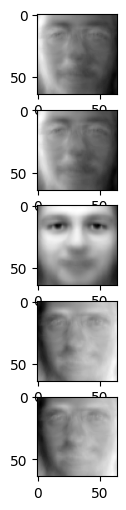

In [28]:
# Write your own code here to display the five exemplar faces along the 2nd eigenface direction
def five_exemplar_faces(eigenfaces, mean_X, pca, eigenface_ID, num_faces=5, scale_factors=[-2, -1, 0, 1, 2]):
    face = eigenfaces[eigenface_ID]
    s = pca.singular_values_[eigenface_ID]
    s_row = np.ones(4096) * s

    exemplar_faces = []
    for factor in scale_factors:
        exemplar_faces.append(np.array(mean_X) + np.array(face) * np.array(factor * s_row))

    exemplar_faces = np.vstack(exemplar_faces)

    plot_faces(exemplar_faces, num_faces, 1)

# Display five exemplar faces along the 2nd eigenface direction
five_exemplar_faces(eigenfaces, mean_X, pca, eigenface_ID=1)

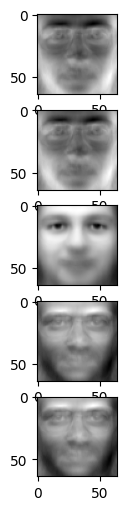

In [29]:
# Write your own code here to display the five exemplar faces along the 2nd eigenface direction
def five_exemplar_faces(eigenfaces, mean_X, pca, eigenface_ID, num_faces=5, scale_factors=[-2, -1, 0, 1, 2]):
    face = eigenfaces[eigenface_ID]
    s = pca.singular_values_[eigenface_ID]
    s_row = np.ones(4096) * s

    exemplar_faces = []
    for factor in scale_factors:
        exemplar_faces.append(np.array(mean_X) + np.array(face) * np.array(factor * s_row))

    exemplar_faces = np.vstack(exemplar_faces)

    plot_faces(exemplar_faces, num_faces, 1)

# Display five exemplar faces along the 3rd eigenface direction
five_exemplar_faces(eigenfaces, mean_X, pca, eigenface_ID=2)

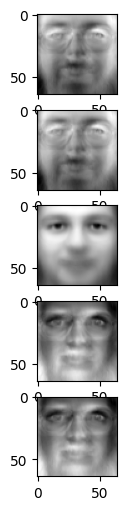

In [30]:
# Write your own code here to display the five exemplar faces along the 2nd eigenface direction
def five_exemplar_faces(eigenfaces, mean_X, pca, eigenface_ID, num_faces=5, scale_factors=[-2, -1, 0, 1, 2]):
    face = eigenfaces[eigenface_ID]
    s = pca.singular_values_[eigenface_ID]
    s_row = np.ones(4096) * s

    exemplar_faces = []
    for factor in scale_factors:
        exemplar_faces.append(np.array(mean_X) + np.array(face) * np.array(factor * s_row))

    exemplar_faces = np.vstack(exemplar_faces)

    plot_faces(exemplar_faces, num_faces, 1)

# Display five exemplar faces along the 4th eigenface direction
five_exemplar_faces(eigenfaces, mean_X, pca, eigenface_ID=3)